# Задание 3. Классификация вручную

Вам дана таблица данных в формате CSV,  данные в строчках разделены символом «точка-с-запятой». Файл создан департаментом сельского хозяйства США и в нём указаны продукты и содержание в них некоторых витаминов, минералов, а также калорийность на единицу массы.

Вам необходимо:

## 0. Импорт библиотек, загрузка данных.

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#files.upload()
product_data = pd.read_csv('ABBREV.csv', delimiter=';')

In [3]:
product_data.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,BUTTER.WITH SALT,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215,5.00,"1 pat. (1"" sq. 1/3"" high)",14.2,1 tbsp,0.0
1,1002,BUTTER.WHIPPED.W/ SALT,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225,3.80,"1 pat. (1"" sq. 1/3"" high)",9.4,1 tbsp,0.0
2,1003,BUTTER OIL.ANHYDROUS,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,CHEESE.BLUE,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,CHEESE.BRICK,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94,132.00,1 cup. diced,113.0,1 cup. shredded,0.0


## 1. Понять, как устроены эти данные. Посчитать общую статистику.

In [4]:
product_data.columns

Index(['NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object')



1. 'NDB_No' 
2. 'Shrt_Desc' - short description 
3. 'Water_(g)'
4. 'Energ_Kcal'
5. 'Protein_(g)' - белок
6. 'Lipid_Tot_(g)' - lipid total, жир
7. 'Ash_(g)' - any inorganic material? such as minerals? presenting in food
8. 'Carbohydrt_(g)' - carbohydrate (carbs)
9. 'Fiber_TD_(g)' - волокно, td=total?
10. 'Sugar_Tot_(g)' - sugar total
11. 'Calcium_(mg)'
12. 'Iron_(mg)'
13. 'Magnesium_(mg)' - магний
14. 'Phosphorus_(mg)'
15. 'Potassium_(mg)' - калий
16. 'Sodium_(mg)' - натрий
17. 'Zinc_(mg)'
18. 'Copper_mg)' - медь
19. 'Manganese_(mg)' - марганец
20. 'Selenium_(µg)' - селен
21. 'Vit_C_(mg)'
22. 'Thiamin_(mg)'
23. 'Riboflavin_(mg)'
24. 'Niacin_(mg)'
25. 'Panto_Acid_mg)'
26. 'Vit_B6_(mg)'
27. 'Folate_Tot_(µg)' - фолат
28. 'Folic_Acid_(µg)' - фолиевая кислота
29. 'Food_Folate_(µg)' - пищевой фолат
30. 'Folate_DFE_(µg)' - folate Dietary Folate Equivalent
31. 'Choline_Tot_ (mg)' - холин
32. 'Vit_B12_(µg)'
33. 'Vit_A_IU' - vitamin A International Units
34. 'Vit_A_RAE' - vitamin A Retinol Activity Equivalent
35. 'Retinol_(µg)'
36. 'Alpha_Carot_(µg)'
37. 'Beta_Carot_(µg)'
38. 'Beta_Crypt_(µg)' - ?
39. 'Lycopene_(µg)' - ликопин
40. 'Lut+Zea_ (µg)' - ?
41. 'Vit_E_(mg)'
42. 'Vit_D_µg'
43. 'Vit_D_IU'
44. 'Vit_K_(µg)'
45. 'FA_Sat_(g)' - saturated fat
46. 'FA_Mono_(g)' - monosaturated fat
47. 'FA_Poly_(g)' polysaturated fat
48. 'Cholestrl_(mg)' - холестерин
49. 'GmWt_1' - Gram Weight?
50. 'GmWt_Desc1'
51. 'GmWt_2'
52. 'GmWt_Desc2'
53. 'Refuse_Pct' - refuse persent?



Общая статистика

In [5]:
product_data.describe()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
count,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,...,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8740.000000
mean,15663.495222,54.106061,226.317634,11.342849,10.553725,1.717527,22.127710,2.039625,6.762531,73.700114,...,0.364300,14.591809,9.295370,3.434338,3.771797,2.115612,38.718885,93.105193,137.640216,4.964416
std,9251.413586,30.776516,169.877539,10.530474,15.814842,2.967679,27.270822,4.267904,13.723474,200.017998,...,3.091688,123.670680,62.125274,6.426162,6.825884,5.050857,117.353035,84.713057,309.447941,12.088471
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9086.250000,29.692500,91.000000,2.380000,0.950000,0.770000,0.050000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,0.149000,0.074250,0.134250,0.000000,28.350000,0.000000,0.000000
50%,14427.500000,63.080000,191.000000,8.000000,5.140000,1.170000,9.340000,0.400000,0.490000,19.000000,...,0.000000,0.000000,0.000000,1.435500,1.600000,0.591500,2.000000,85.000000,15.000000,0.000000
75%,20142.750000,77.960000,337.000000,19.880000,13.720000,2.020000,34.910000,2.400000,6.057500,64.000000,...,0.000000,1.000000,1.900000,4.173750,4.759000,1.880000,65.000000,128.000000,186.000000,0.000000
max,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,7364.000000,...,250.000000,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,81.000000


## 2. Придумать логичный способ разделения этих продуктов на две части, то есть самим вручную создать "бинарный классификатор". Визуализировать результат разбиения. 

Изменим тип данных столбца с калориями на числовой

In [6]:
product_data['Energ_Kcal'] = pd.to_numeric(product_data['Energ_Kcal'])

Создадим вспомогательный словарь, в котором ключами будут числа от 0 до 1000, а значениями - классы калорийности

In [7]:
dict_Energ_Kcal_borders_2 = {'Impossible': 0, 'Low': 200, 'High': 1001}
list_Energ_Kcal_shades_2 = list(dict_Energ_Kcal_borders_2.keys())
dict_Energ_Kcal_possible_values_2 = {}
for i in range(0, len(list_Energ_Kcal_shades_2) - 1):
  for j in range(dict_Energ_Kcal_borders_2[list_Energ_Kcal_shades_2[i]], dict_Energ_Kcal_borders_2[list_Energ_Kcal_shades_2[i + 1]]):
    dict_Energ_Kcal_possible_values_2[j] = list_Energ_Kcal_shades_2[i + 1]

Создадим и заполним с помощью вспомогательного словаря колонку, определяющую класс объекта

In [8]:
product_data['Energ_Kcal_binary_class'] = product_data.Energ_Kcal.map(dict_Energ_Kcal_possible_values_2)
product_data.Energ_Kcal_binary_class.unique()

array(['High', 'Low'], dtype=object)

Визуализируем с помощью библиотеки seaborn

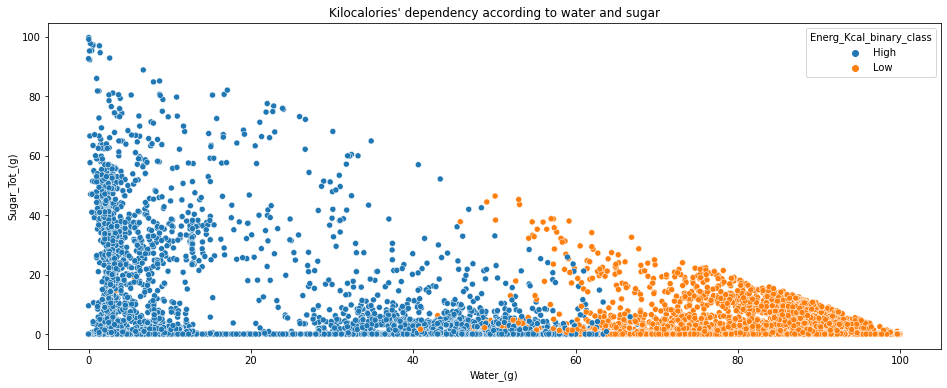

In [9]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
# Add title
plt.title("Kilocalories' dependency according to water and sugar")
# Use color-coded scatter plot
sns.scatterplot(x='Water_(g)', y='Sugar_Tot_(g)', hue='Energ_Kcal_binary_class', data=product_data);

## 3. Придумать способ разделения на несколько классов. Визуализировать и прокомментировать результат.

5 классов либо 3, 3 выходят более четкие границы

In [10]:
dict_Energ_Kcal_borders_3 = {'Impossible': 0, 'Extremely low': 31, 'Low': 71, 'Moderate': 201, 'High': 401, 'Extremely high': 1001}
#dict_Energ_Kcal_borders_3 = {'Impossible': 0, 'Low': 71, 'Moderate': 201, 'High': 1001}
list_Energ_Kcal_shades_3 = list(dict_Energ_Kcal_borders_3.keys())
dict_Energ_Kcal_possible_values_3 = {}
for i in range(0, len(list_Energ_Kcal_shades_3) - 1):
  for j in range(dict_Energ_Kcal_borders_3[list_Energ_Kcal_shades_3[i]], dict_Energ_Kcal_borders_3[list_Energ_Kcal_shades_3[i + 1]]):
    dict_Energ_Kcal_possible_values_3[j] = list_Energ_Kcal_shades_3[i + 1]

In [11]:
product_data['Energ_Kcal_multiple_class'] = product_data.Energ_Kcal.map(dict_Energ_Kcal_possible_values_3)
product_data.Energ_Kcal_multiple_class.unique()

array(['Extremely high', 'High', 'Moderate', 'Low', 'Extremely low'],
      dtype=object)

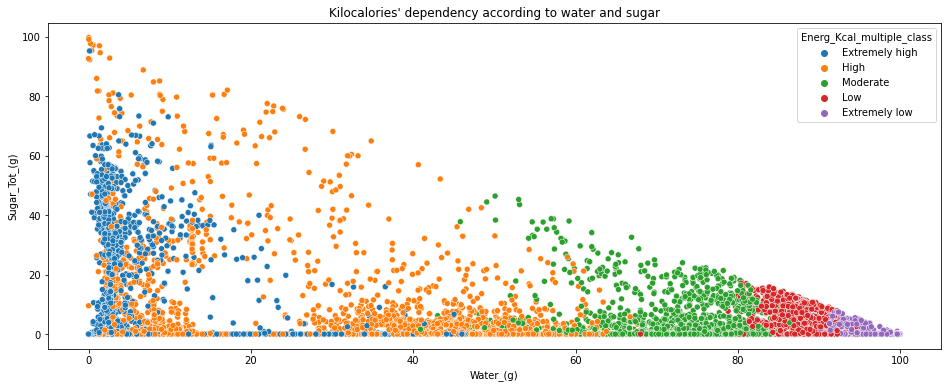

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
# Add title
plt.title("Kilocalories' dependency according to water and sugar")
# Use color-coded scatter plot
sns.scatterplot(x='Water_(g)', y='Sugar_Tot_(g)', hue='Energ_Kcal_multiple_class', data=product_data);

## 4*. Проанализировать данные. Найти какую-либо зависимость одного параметра от другого.

In [13]:
list_of_number_columns = ['NDB_No', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_2',
       'Refuse_Pct']

Построим и визуализируем корреляционную матрицу.

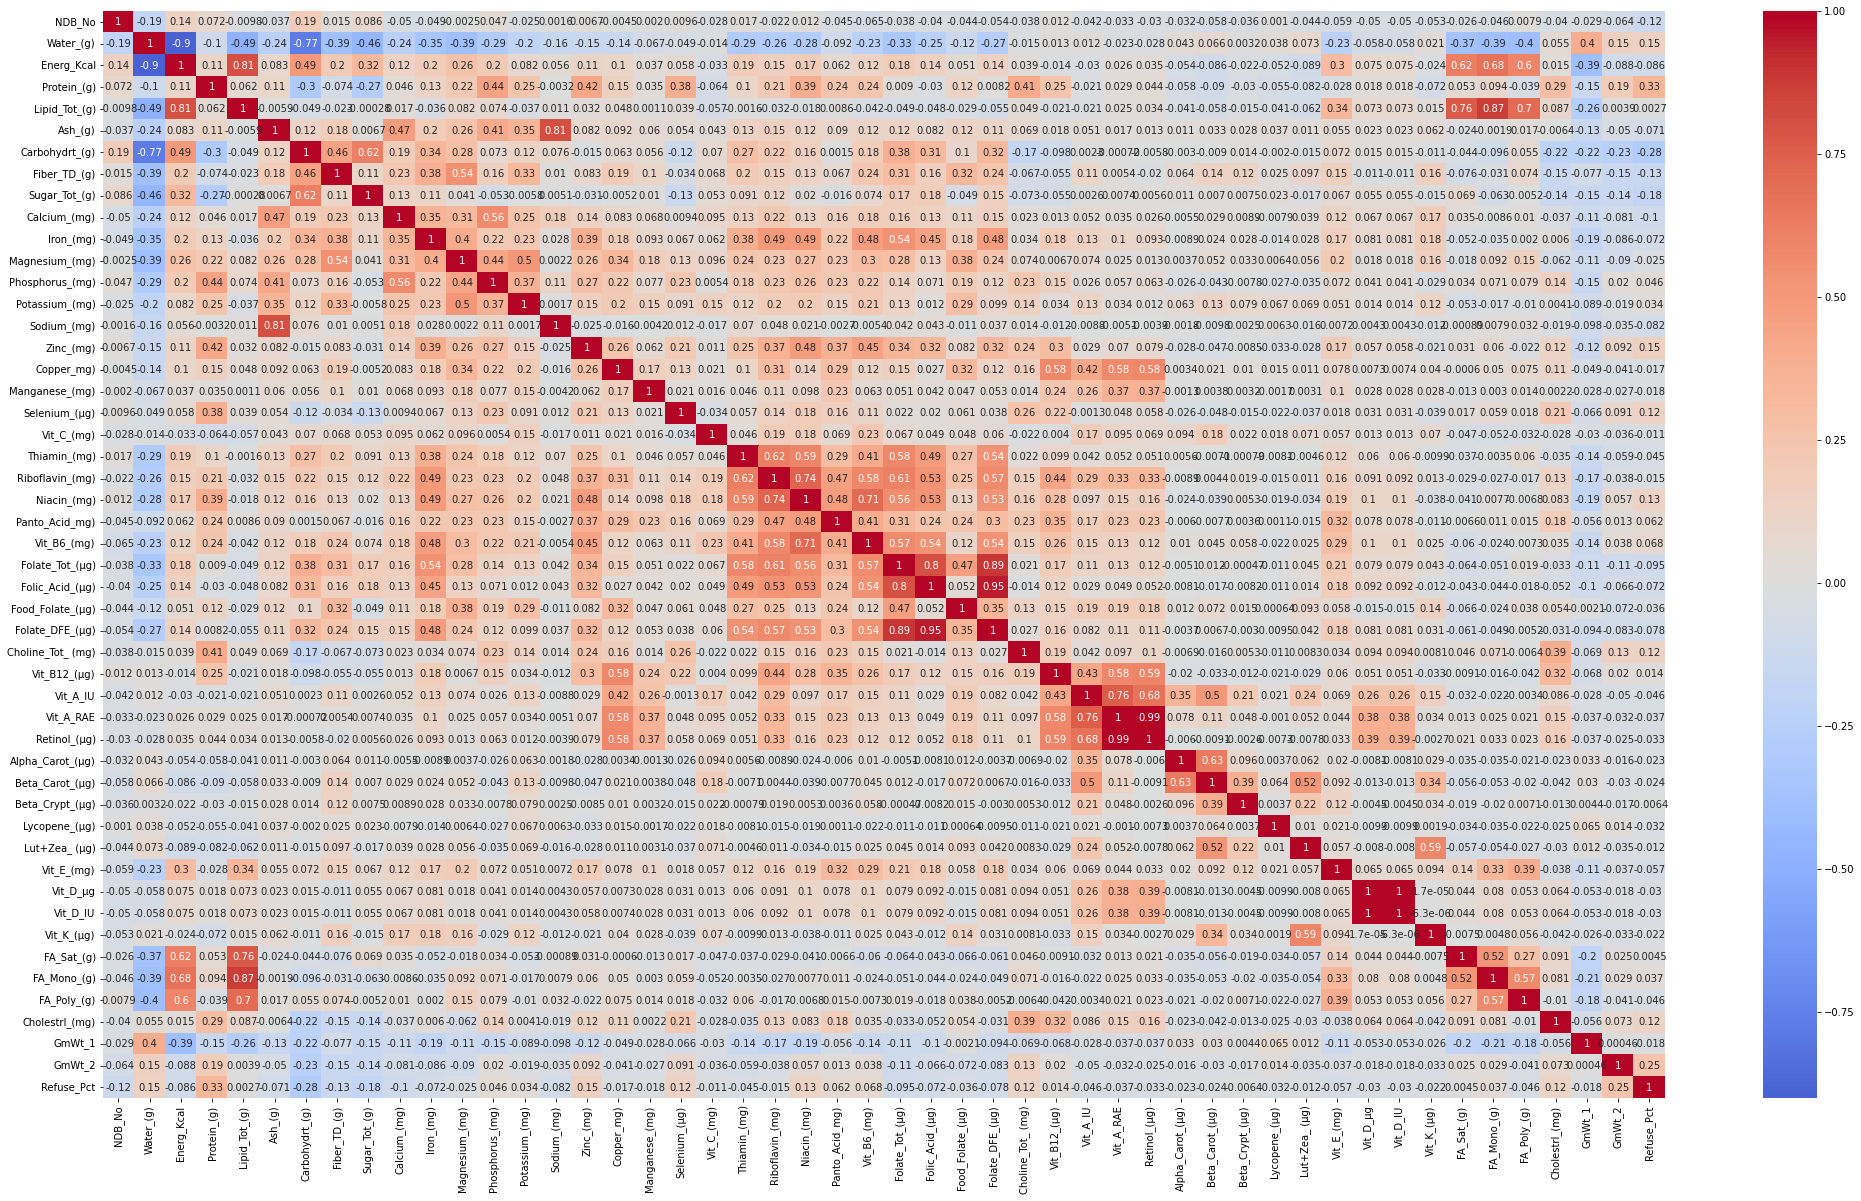

In [22]:
correlation_matrix = pd.DataFrame.corr(product_data[list_of_number_columns])
fig, ax = plt.subplots(figsize=(35,20))
#display(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", center=0, ax=ax);

Зависимость есть

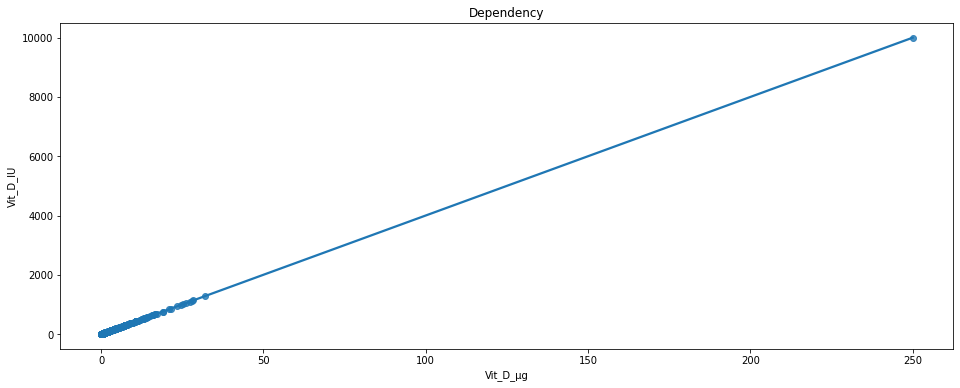

In [15]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
# Add title
plt.title("Dependency")
# Use color-coded scatter plot
sns.regplot(x='Vit_D_µg', y='Vit_D_IU', data=product_data);

Зависимости нет, что странно, потому что вроде это витамин A в разных единицах

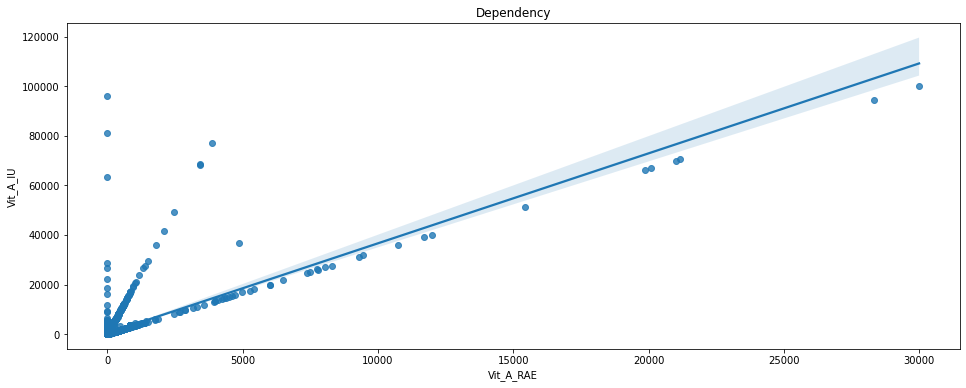

In [16]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
# Add title
plt.title("Dependency")
# Use color-coded scatter plot
sns.regplot(x='Vit_A_RAE', y='Vit_A_IU', data=product_data);

## Запись файла для 4 задания

In [17]:
product_data.to_csv('ABBREV_with_classes_Ogneva.csv', sep=';', index=False)